# Pauses Detection using python 

#### Author : Ahmed Ayman   , LinkedIn: https://www.linkedin.com/in/ahmed-ayman-abdelhakeem/

###### In that project we use a signal_processing to detect the silence parts and calculate a pauses percentage 

### For inference we use a librispeech dataset for that 

In [19]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file = "/Users/ahmed/Documents/GitHub/English_Oral_Test/testing_audios/LibriSpeech/19-198-0001.wav"
y, sr = librosa.load(audio_file, sr=None)


In [24]:
# Compute the short-term energy of the signal
energy = librosa.feature.rms(y=y)

# Set a threshold to determine silence
threshold = 0.01  # Adjust this value based on your audio characteristics


In [25]:
# Find the time points where energy is below the threshold
silence_indices = np.where(energy < threshold)[1]

# Convert indices to time in seconds
silence_times = librosa.frames_to_time(silence_indices, sr=sr)
# calculate the frame duration time to calculate the total silence time 
frame_duration = librosa.get_duration(y=y, sr=sr) / len(energy[0])


In [26]:
# Calculate the pauses percentage
total_silence_time = round(frame_duration * len(silence_times) , 2)
total_audio_time = len(y)/sr
pauses_percentage = round((total_silence_time/total_audio_time) * 100 ,2)


# Look at the Result 😉

Silence times (seconds): 3.23
Audio time (seconds): 11.765
Pauses Percentage is: 27.45 %


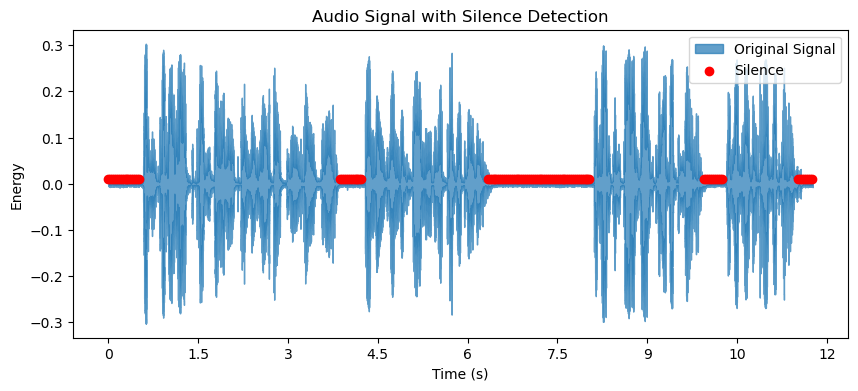

In [27]:
print("Silence times (seconds):", total_silence_time)
print("Audio time (seconds):", total_audio_time)
print("Pauses Percentage is:", pauses_percentage , '%')


# Plot the audio signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.7, label='Original Signal');
#plt.axhline(threshold, color='r', linestyle='--', label='Threshold')

# Highlight the regions of silence
plt.scatter(silence_times, [threshold] * len(silence_times), color='r', label='Silence')

plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Audio Signal with Silence Detection')
plt.legend()
plt.show()

#### Feel free to further customize the headline and README content based on your preferences and provide more details as needed.



